In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.applications import VGG16
from keras.models import Sequential


# # Ucitavanje dataset-a sa manjim slikama

In [2]:
path = 'spektogrami'

def load_image_dataset(shuffle):
    
    imgs = keras.utils.image_dataset_from_directory(path, labels='inferred', color_mode='rgb', batch_size=250, shuffle=shuffle)

    images = []
    labels = []
    for (i, l) in imgs.as_numpy_iterator():
        images = i / 255
        labels = to_categorical(l)
        
    return images, labels

In [3]:
images, labels = load_image_dataset(True)

Found 250 files belonging to 5 classes.


In [4]:
from matplotlib import pyplot as plt

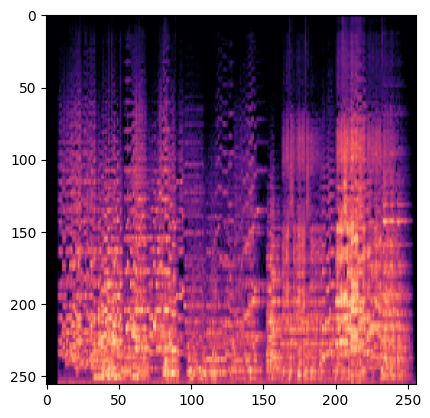

In [5]:
plt.imshow(images[0])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, stratify=labels)

In [7]:
input_shape = X_train.shape[1:]
num_classes = 5

In [8]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

In [9]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model1.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 30s 4s/step - loss: 4.4547 - accuracy: 0.1500 - val_loss: 1.5565 - val_accuracy: 0.2857
Epoch 2/20
5/5 [==============================] - 15s 3s/step - loss: 1.6576 - accuracy: 0.1786 - val_loss: 1.7099 - val_accuracy: 0.1429
Epoch 3/20
5/5 [==============================] - 14s 3s/step - loss: 1.6052 - accuracy: 0.2500 - val_loss: 1.6175 - val_accuracy: 0.1143
Epoch 4/20
5/5 [==============================] - 14s 3s/step - loss: 1.5969 - accuracy: 0.2071 - val_loss: 1.6186 - val_accuracy: 0.0857
Epoch 5/20
5/5 [==============================] - 14s 3s/step - loss: 1.5663 - accuracy: 0.3500 - val_loss: 1.5897 - val_accuracy: 0.2286
Epoch 6/20
5/5 [==============================] - 14s 3s/step - loss: 1.5182 - accuracy: 0.4714 - val_loss: 1.6554 - val_accuracy: 0.1143
Epoch 7/20
5/5 [==============================] - 14s 3s/step - loss: 1.4748 - accuracy: 0.4071 - val_loss: 1.5726 - val_accuracy: 0.2571
Epoch 8/20
5/5 [==================

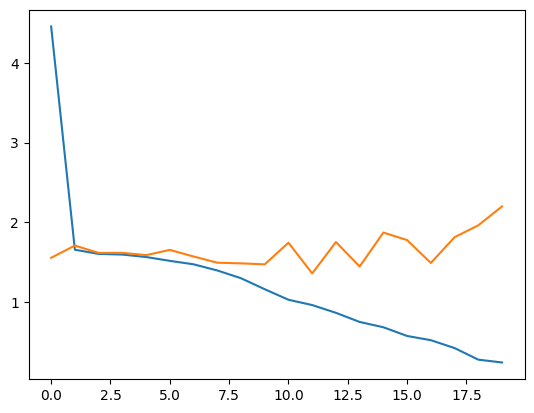

In [11]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

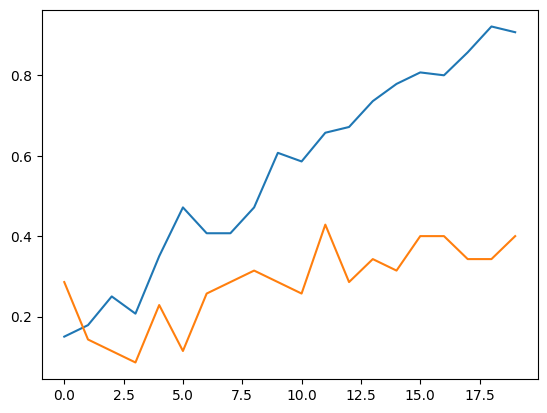

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)

In [13]:
model1.evaluate(X_test, y_test)

3/3 [==============================] - 7s 338ms/step - loss: 1.4428 - accuracy: 0.5067


[1.442753553390503, 0.5066666603088379]

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
import numpy as np

In [16]:
y_pred = model1.predict(X_test)
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

3/3 [==============================] - 8s 339ms/step


array([[10,  0,  0,  3,  2],
       [ 2, 10,  0,  3,  0],
       [ 7,  0,  8,  0,  0],
       [ 8,  0,  0,  7,  0],
       [ 6,  1,  1,  4,  3]], dtype=int64)

# # Ucitavanje dateset-a sa vecim slikama

In [17]:
path2 = 'spektrogrami2'
images2, labels2 = load_image_dataset(True)

Found 250 files belonging to 5 classes.


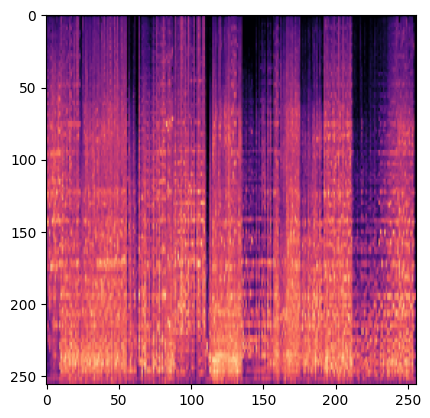

In [18]:
plt.imshow(images2[0])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(images2, labels2, test_size=0.3, stratify=labels)

In [20]:
input_shape = X_train.shape[1:]
num_classes = 5

In [21]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)      

In [22]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model2.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 25s 4s/step - loss: 1.6604 - accuracy: 0.2357 - val_loss: 1.5937 - val_accuracy: 0.3143
Epoch 2/20
5/5 [==============================] - 14s 3s/step - loss: 1.5467 - accuracy: 0.3643 - val_loss: 1.6248 - val_accuracy: 0.1714
Epoch 3/20
5/5 [==============================] - 14s 3s/step - loss: 1.4827 - accuracy: 0.3286 - val_loss: 1.5682 - val_accuracy: 0.2286
Epoch 4/20
5/5 [==============================] - 15s 3s/step - loss: 1.3973 - accuracy: 0.3929 - val_loss: 1.4512 - val_accuracy: 0.3429
Epoch 5/20
5/5 [==============================] - 14s 3s/step - loss: 1.2484 - accuracy: 0.4857 - val_loss: 1.4559 - val_accuracy: 0.3429
Epoch 6/20
5/5 [==============================] - 14s 3s/step - loss: 1.0016 - accuracy: 0.7071 - val_loss: 1.2981 - val_accuracy: 0.4571
Epoch 7/20
5/5 [==============================] - 15s 3s/step - loss: 0.7865 - accuracy: 0.7786 - val_loss: 1.3906 - val_accuracy: 0.4571
Epoch 8/20
5/5 [==================

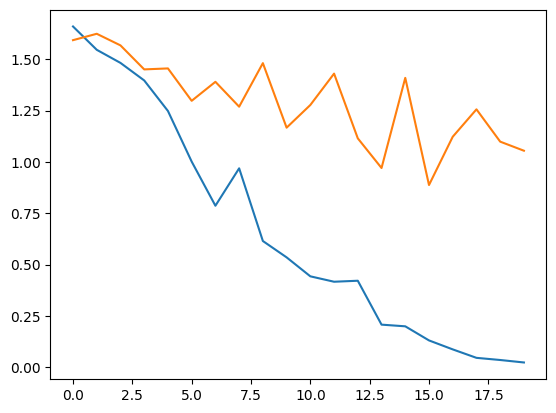

In [24]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

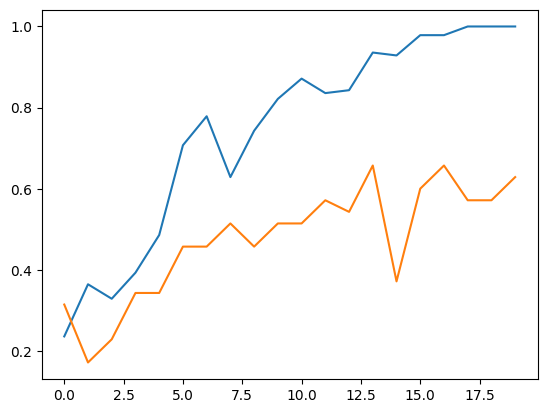

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)

In [26]:
model2.evaluate(X_test, y_test)

3/3 [==============================] - 3s 332ms/step - loss: 1.8416 - accuracy: 0.6000


[1.841603398323059, 0.6000000238418579]

In [36]:
y_pred = model2.predict(X_test)
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

3/3 [==============================] - 9s 346ms/step


array([[10,  1,  1,  0,  1],
       [ 3,  9,  3,  1,  0],
       [ 0,  0, 10,  0,  0],
       [ 5,  4,  2,  9,  1],
       [ 2,  1,  0,  5,  7]], dtype=int64)

# # model + VGGNet

In [33]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

model3 = Sequential()
model3.add(base_model)
model3.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 32)          147488    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 2, 2, 64)         

In [34]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model3.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
5/5 [==============================] - 296s 55s/step - loss: 1.6657 - accuracy: 0.1714 - val_loss: 1.6110 - val_accuracy: 0.1143
Epoch 2/10
5/5 [==============================] - 299s 59s/step - loss: 1.6108 - accuracy: 0.2143 - val_loss: 1.6258 - val_accuracy: 0.1429
Epoch 3/10
5/5 [==============================] - 332s 64s/step - loss: 1.7116 - accuracy: 0.2143 - val_loss: 1.6602 - val_accuracy: 0.1143
Epoch 4/10
5/5 [==============================] - 315s 62s/step - loss: 1.6206 - accuracy: 0.2357 - val_loss: 1.6224 - val_accuracy: 0.1143
Epoch 5/10
5/5 [==============================] - 313s 62s/step - loss: 1.6098 - accuracy: 0.2000 - val_loss: 1.6190 - val_accuracy: 0.1714
Epoch 6/10
5/5 [==============================] - 301s 60s/step - loss: 1.6029 - accuracy: 0.2286 - val_loss: 1.6230 - val_accuracy: 0.1714
Epoch 7/10
5/5 [==============================] - 314s 61s/step - loss: 1.6081 - accuracy: 0.2357 - val_loss: 1.6253 - val_accuracy: 0.1714
Epoch 8/10
5/5 [====

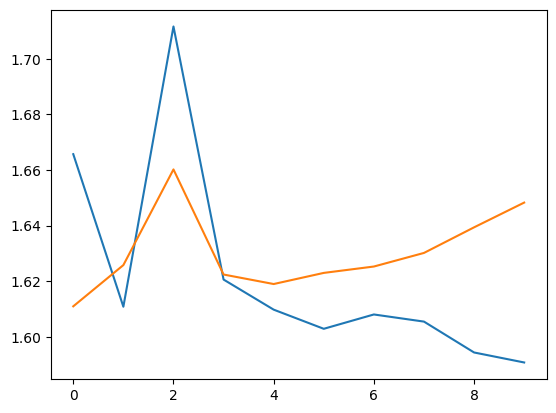

In [37]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

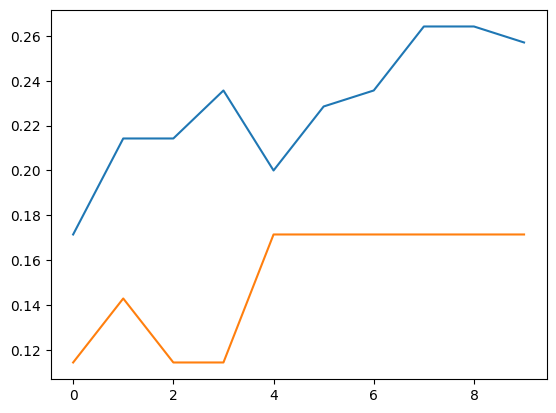

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)

In [39]:
model3.evaluate(X_test, y_test)

3/3 [==============================] - 55s 16s/step - loss: 1.6727 - accuracy: 0.1600


[1.6727337837219238, 0.1599999964237213]

In [40]:
y_pred = model3.predict(X_test)
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

3/3 [==============================] - 51s 13s/step


array([[ 2,  0, 11,  0,  0],
       [ 0,  0, 16,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 3,  0, 18,  0,  0],
       [ 1,  0, 14,  0,  0]], dtype=int64)